In [31]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [32]:
matplotlib.rcParams['figure.figsize']=[18,12]
data = np.load('clusterable_data.npy')
#depending on the format of the file

In [33]:
data.shape

(2309, 2)

In [34]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ..., 
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

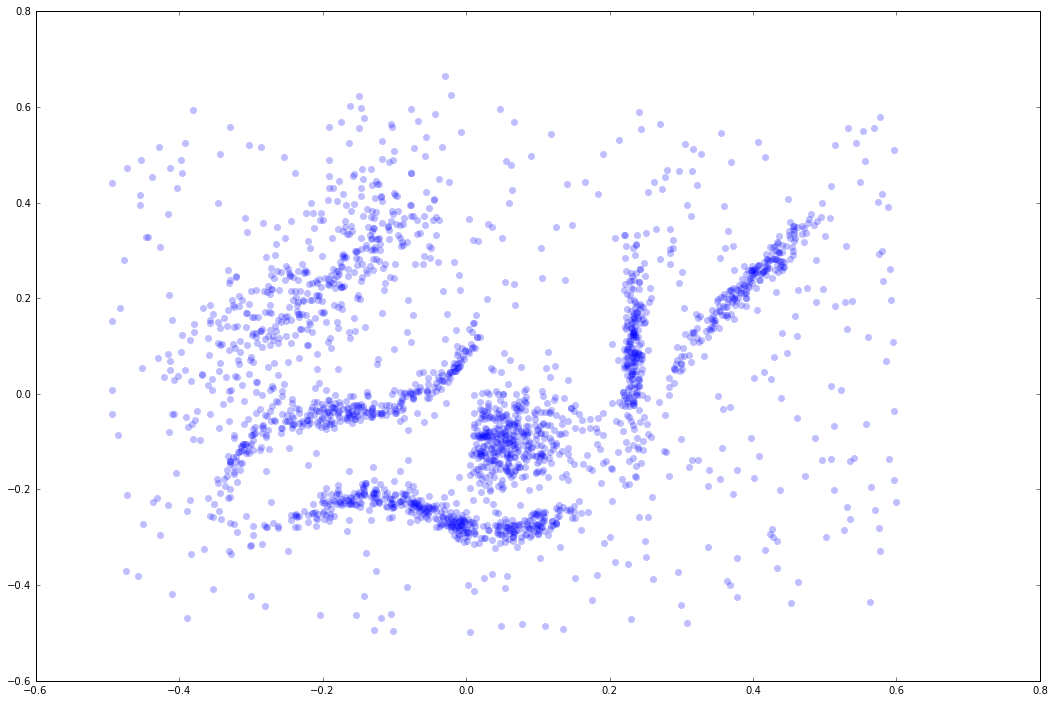

In [35]:
plt.scatter(*data.T, s=50, linewidth=0, c='b', alpha=0.25)

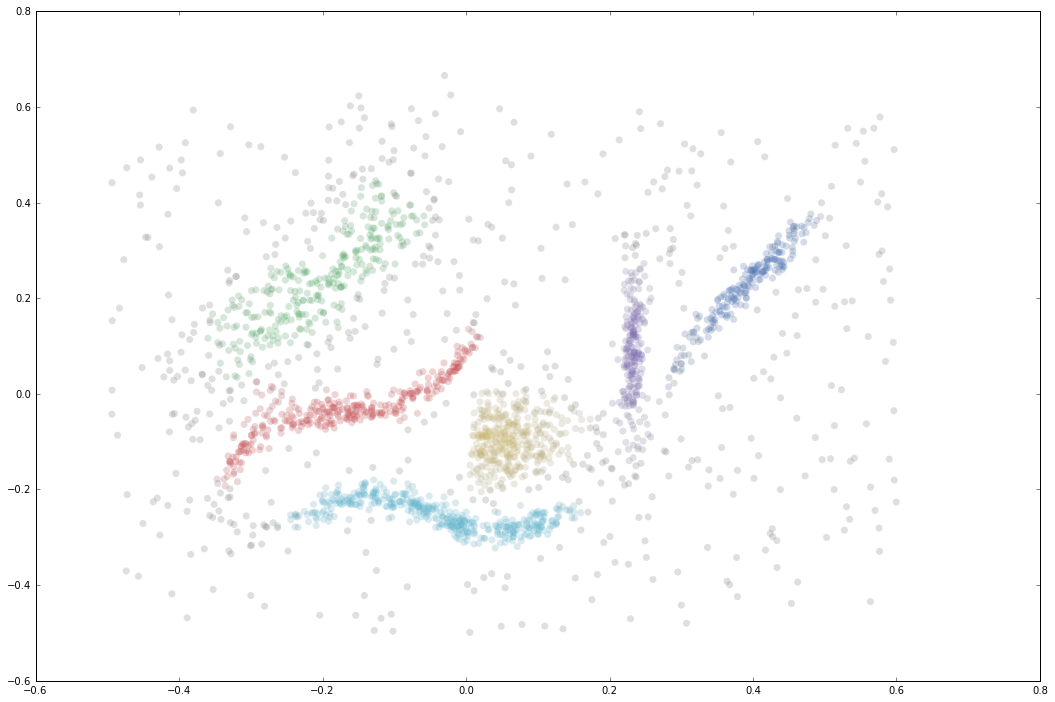

In [36]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

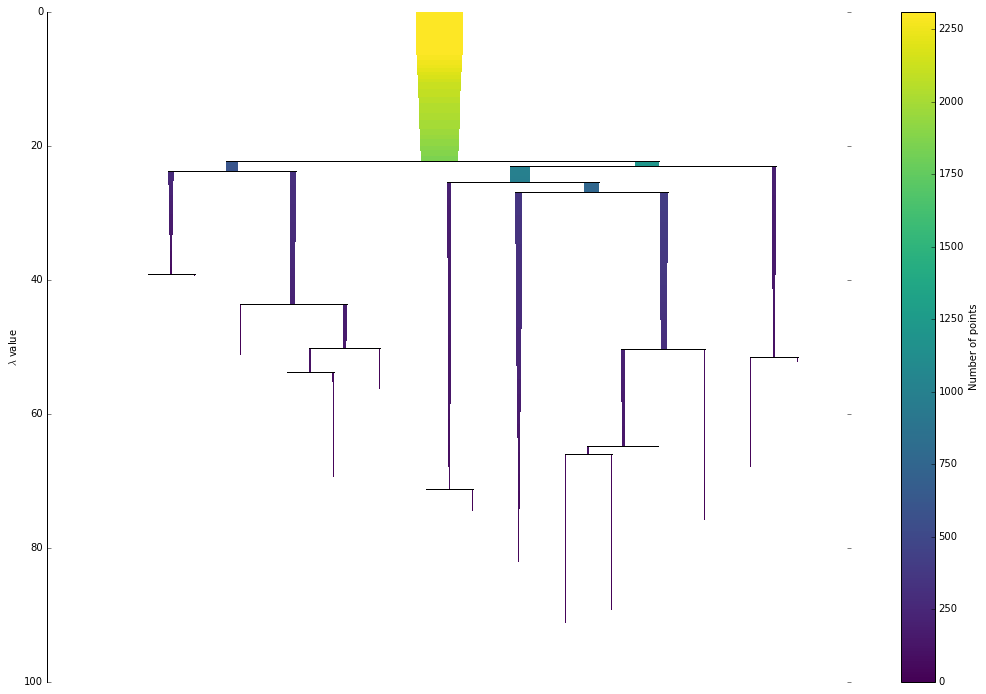

In [37]:
clusterer.condensed_tree_
clusterer.condensed_tree_.plot()

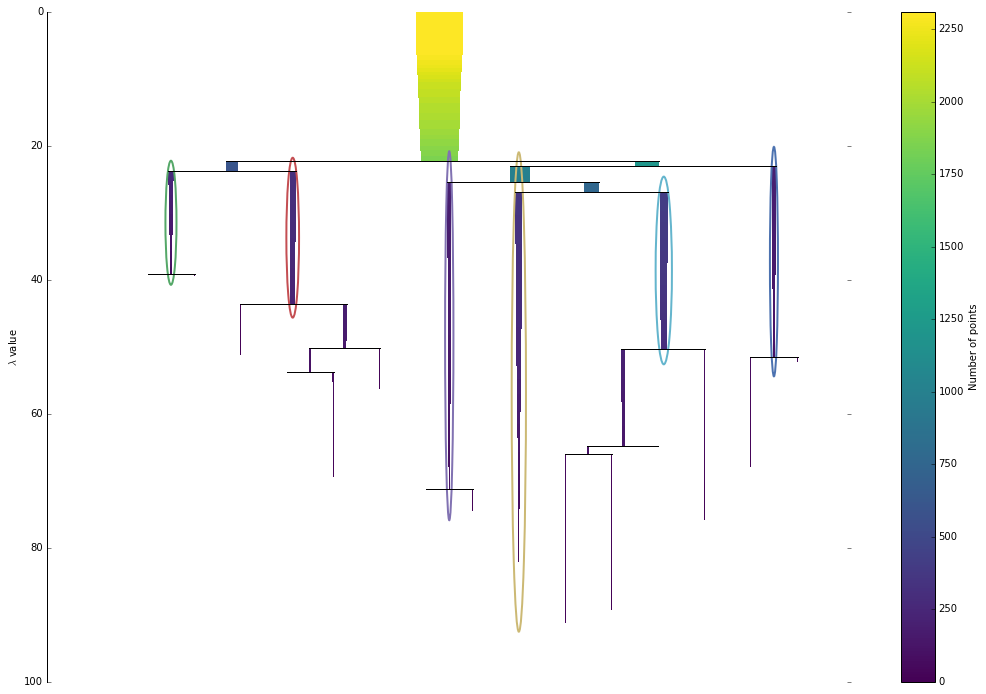

In [38]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))


In [39]:
clusterer.condensed_tree_.to_networkx()
g = clusterer.condensed_tree_.to_networkx()
g.number_of_nodes()

2338

In [115]:
treedata=clusterer.condensed_tree_.to_pandas()
clusterer.condensed_tree_.to_pandas()

,parent,child,lambda_val,child_size
0,2309,2048,5.016526,1
1,2309,2006,5.076503,1
2,2309,2024,5.279133,1
3,2309,2050,5.347332,1
4,2309,1992,5.381930,1
5,2309,2246,5.543703,1
6,2309,2105,5.737914,1
7,2309,2009,5.763440,1
8,2309,2303,5.786966,1
9,2309,2111,5.813582,1


In [116]:
treedata[treedata.parent==2330]

,parent,child,lambda_val,child_size
1724,2330,1752,53.753723,1
1725,2330,1824,53.753723,1
1726,2330,1728,53.753723,1
1727,2330,2036,53.753723,1
1728,2330,1744,53.753723,1
1729,2330,1764,53.753723,1
1730,2330,1858,53.753723,1
1731,2330,1731,53.753723,1
1732,2330,1605,53.753723,1
1733,2330,1610,53.753723,1


In [117]:
p=treedata[treedata.child==2330].parent.values[0]
print(p)
treedata[treedata.parent==p]

2328


,parent,child,lambda_val,child_size
1544,2328,1631,50.168737,1
1552,2328,1903,50.389076,1
1560,2328,1897,50.455843,1
1568,2328,1787,50.455843,1
1576,2328,1693,50.620779,1
1598,2328,1690,50.633230,1
1605,2328,1749,50.673856,1
1612,2328,1896,50.895338,1
1633,2328,1740,51.036043,1
1653,2328,1850,51.379374,1


In [120]:
p=treedata[treedata.child==p].parent.values[0]
print(p)
treedata[treedata.parent==p]

2310


,parent,child,lambda_val,child_size
470,2310,1487,22.227453,1
472,2310,2284,22.235651,1
474,2310,2183,22.388743,1
476,2310,1447,22.420264,1
478,2310,1410,22.436489,1
480,2310,1491,22.446904,1
482,2310,1547,22.452231,1
484,2310,1268,22.455550,1
486,2310,1216,22.472425,1
488,2310,1358,22.662968,1


In [81]:
treedata[treedata.child==2328]

,parent,child,lambda_val,child_size
1536,2323,2328,50.168737,123


In [82]:
treedata[treedata.parent==2323]

,parent,child,lambda_val,child_size
1175,2323,1825,43.783679,1
1183,2323,1755,43.814392,1
1191,2323,1683,43.852608,1
1199,2323,1652,43.931125,1
1221,2323,1601,44.135078,1
1228,2323,1748,44.153542,1
1235,2323,1643,44.462964,1
1252,2323,1771,44.467338,1
1259,2323,1877,44.716570,1
1280,2323,1715,44.920721,1


In [69]:
treedata.loc[2061,:]

parent        2318.000000
child          812.000000
lambda_val      61.874535
child_size       1.000000
Name: 2061, dtype: float64

In [70]:
treedata.loc[812,:]

parent        2318.000000
child         1184.000000
lambda_val      33.651729
child_size       1.000000
Name: 812, dtype: float64

In [41]:
tree = clusterer.condensed_tree_.to_pandas()
cluster_tree = tree[tree.child_size > 1]

In [46]:
cluster_tree

,parent,child,lambda_val,child_size
468,2309,2310,22.149180,625
469,2309,2311,22.149180,1216
495,2311,2312,22.974381,1004
496,2311,2313,22.974381,200
560,2310,2314,23.727882,275
561,2310,2315,23.727882,316
575,2312,2316,25.366360,208
576,2312,2317,25.366360,772
631,2317,2318,26.892063,356
632,2317,2319,26.892063,406


In [42]:
clusterer.condensed_tree_.to_numpy()

array([(2309, 2048, 5.016525967983049, 1),
       (2309, 2006, 5.076503128308643, 1),
       (2309, 2024, 5.279133057912248, 1), ...,
       (2318, 1105, 86.5507370650292, 1), (2318, 965, 86.5507370650292, 1),
       (2318, 954, 86.5507370650292, 1)], 
      dtype=[('parent', '<i8'), ('child', '<i8'), ('lambda_val', '<f8'), ('child_size', '<i8')])

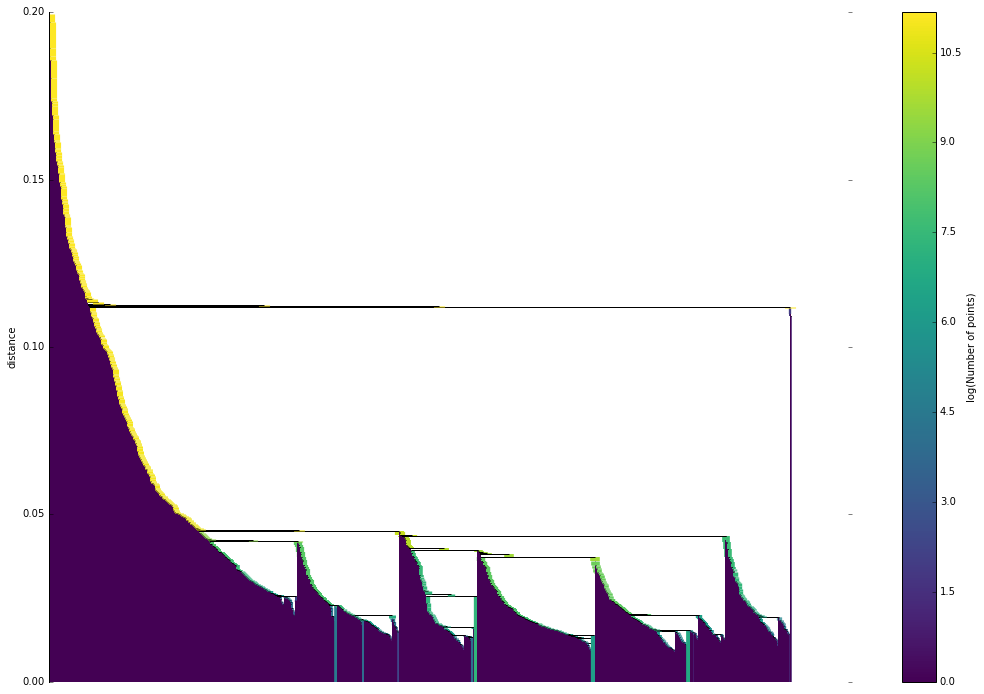

In [43]:
clusterer.single_linkage_tree_
clusterer.single_linkage_tree_.plot()

In [45]:
clusterer.single_linkage_tree_.get_clusters(0.023, min_cluster_size=2)


array([ 0, -1,  0, ..., -1, -1,  0], dtype=int64)